**# Step 1: ให้หา datasets ที่จะใช้ในการทำ Model Regression**
[Kaggle Datasets](https://www.kaggle.com/datasets?search=regression)

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/06/"

/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/06


In [7]:
# Read the CSV file
university_df = pd.read_csv('university_admission.csv')

In [8]:
# Display the feature columns (มี Column ชื่ออะไรบ้าง)
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [9]:
# Check the shape of the dataframe (เช็คขนาดข้อมูลว่ามีกี่แถว กี่คอลัมน์) ->.shape
university_df.shape

(1000, 8)

In [10]:
# Check data types of each column ->.dtypes
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [11]:
# Check if any missing values are present in the dataframe -> .isnull().sum()
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

**# Step2: ถ้าในกรณีที่ข้อมูลเป็นแบบ categorical ให้เติมค่า Missing value ด้วย [Pandas – Filling NaN in Categorical data](https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/)**

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

**# Step4: สร้างตัวแปรสำหรับเก็บ Input data และ Output data**

In [15]:
# สร้างตัวแปร X เพื่อเก็บ Input data
X = university_df.drop(columns=["Chance_of_Admission"])

In [16]:
#สร้างตัวแปร y สำหรับเก็บ Output data
y = university_df["Chance_of_Admission"]

In [17]:
#แปลงข้อมูลจาก Dataframe X และ y ให้เป็น Array X และ Array y
# reshaping the Array y ให้มองเป็นคอลัมน์ด้วย
X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)

**# Step5: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [21]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


**# Step6: Training Model with Regression Algorihtm (สร้าง Model ในการทำนาย)**

In [22]:
# Train regressor model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

**# Step7: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [23]:
# make predictions on the test data
y_predict = model.predict(X_test)

In [25]:
#Evaluate the performance of model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = round(mean_squared_error(y_test, y_predict),3)
MAE = round(mean_absolute_error(y_test, y_predict),3)
r2 = round(r2_score(y_test, y_predict),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.056 
MSE = 0.003 
MAE = 0.04 
R2 = 0.835


**# Step8: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [26]:
# loading library
import pickle

In [51]:
# create an iterator object with write permission - model.pickle and save model
with open ('model','wb')as files:
  pickle.dump(model,files)

In [52]:
# load saved model
with open ('model','rb')as f:
  lr = pickle.load(f)

In [53]:
# Read the CSV file ที่เป็นข้อมูลชุดใหม่
university_dp = pd.read_csv('university_admission_deploy.csv')

In [54]:
#แปลงข้อมูลชุดใหม่ที่อ่านมาได้ ให้อยู่ในรูปแบบ array ->np.array
deploy_X = np.array(university_dp)


In [55]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_X)


**# สรุป Output ที่ได้จากการนำ model ไป deployment**

In [57]:
#แสดงผลลัพธ์ที่ได้จากการ deployment
pd.DataFrame(np.concatenate((deploy_Y,deploy_X),axis=1))

,0,1,2,3,4,5,6,7
0,0.951848,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,0.804123,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,0.653491,316.0,104.0,3.0,3.0,3.5,8.00,1.0


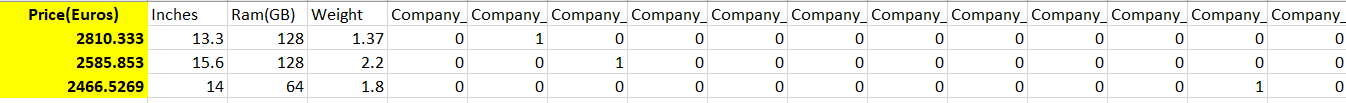

# วิธีการแทน Category Missing Value

In [ ]:
# import modules
import numpy as np
import pandas as pd

# create dataset
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 8],

		'Gender': ['M', 'M', 'F', np.nan,
				np.nan, 'F', 'M', 'F'],

		'Color': [np.nan, "Red", "Blue",
				"Red", np.nan, "Red",
				"Green", np.nan]}

# convert to data frame
df = pd.DataFrame(data)
display(df)


In [ ]:
# filling with most common class
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

